<h1>Importing Libraries </h1>

In [1]:
!pip install --upgrade opencv-contrib-python

Note: you may need to restart the kernel to use updated packages.


In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pathlib
import os
import glob as gb
import cv2
import PIL
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

from tensorflow.keras.callbacks import EarlyStopping ,ReduceLROnPlateau 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D , Dense , Dropout , Flatten , MaxPooling2D , BatchNormalization ,experimental
from tensorflow.keras.utils import to_categorical
from keras.applications.vgg16 import VGG16
from keras.applications.vgg19 import VGG19
from tensorflow import keras
from keras.models import Model

In [68]:
pwd

'C:\\Users\\Sibarama Panigrahi\\Desktop\\RTTSFDL-2023 Course Materials\\Day_4_Lecture_Slides_Initial_Hands_on\\Hands On'

In [69]:
#data path
trainpath = 'C:\\Users\\Sibarama Panigrahi\\Desktop\\RTTSFDL-2023 Course Materials\\Day_4_Lecture_Slides_Initial_Hands_on\\Hands On\\data\\train'#Please give the path where you are saving the train folder.
testpath = 'C:\\Users\\Sibarama Panigrahi\\Desktop\\RTTSFDL-2023 Course Materials\\Day_4_Lecture_Slides_Initial_Hands_on\\Hands On\\data\\test'#please give the path where you are saving the test folder.

<h1>Reading the Train Image </h1>

In [70]:
new_size=224
train_images=[]
train_labels=[]
for i in os.listdir(trainpath):#entering train folder
  print("Entering to the folder name:",i)
  files=gb.glob(pathname=str(trainpath+'/' + i + '/*.jpg'))# pointing to all the .jpg extension image folder
  print("Number of images in the folder is",len(files))
  for j in files:# reading each images
      class_cancer={'benign':0,'malignant':1}
      image_raw=cv2.imread(j)
      image=cv2.cvtColor(image_raw,cv2.COLOR_BGR2RGB)
      resize_image=cv2.resize(image,(new_size,new_size))
      train_images.append(list(resize_image))
      train_labels.append(class_cancer[i])
      

Entering to the folder name: benign
Number of images in the folder is 25
Entering to the folder name: malignant
Number of images in the folder is 25


<h1>Visualizing Train Images </h1>

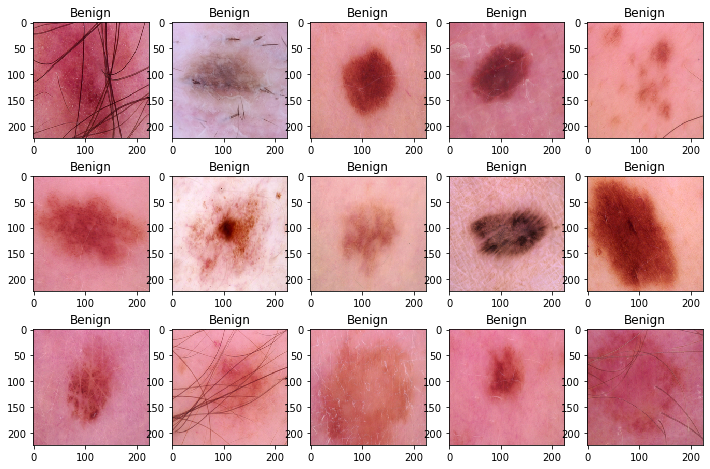

In [71]:
w=40
h=30
fig=plt.figure(figsize=(12, 8))
columns = 5
rows = 3

for i in range(1, columns*rows +1):
    ax = fig.add_subplot(rows, columns, i)
    if train_labels[i] == 0:
        ax.title.set_text('Benign')
    else:
        ax.title.set_text('Malignant')
    plt.imshow(train_images[i], interpolation='nearest')
plt.show()

### Reading Test Images

In [72]:
new_size=224
test_images=[]
test_labels=[]
for i in os.listdir(testpath):# entering to the test folder
  print("Entering to the folder name:",i)
  files=gb.glob(pathname=str(testpath +'/' + i + '/*.jpg'))# pointing to all the .jpg extension image folder
  print("Number of images in the folder is",len(files))
  for j in files:
      class_cancer={'benign':0,'malignant':1}
      image_raw=cv2.imread(j)
      image=cv2.cvtColor(image_raw,cv2.COLOR_BGR2RGB)
      resize_image=cv2.resize(image,(new_size,new_size))
      test_images.append(list(resize_image))
      test_labels.append(class_cancer[i])

Entering to the folder name: benign
Number of images in the folder is 25
Entering to the folder name: malignant
Number of images in the folder is 25


## Visualizing Test Image

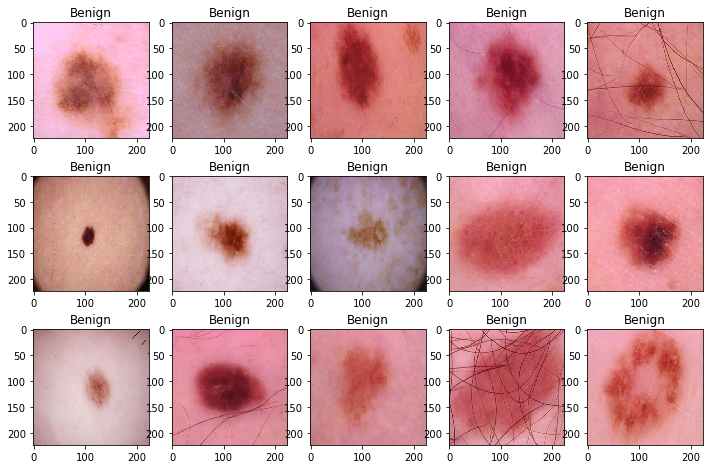

In [73]:
w=40
h=30
fig=plt.figure(figsize=(12, 8))
columns = 5
rows = 3

for i in range(1, columns*rows +1):
    ax = fig.add_subplot(rows, columns, i)
    if test_labels[i] == 0:
        ax.title.set_text('Benign')
    else:
        ax.title.set_text('Malignant')
    plt.imshow(test_images[i], interpolation='nearest')
plt.show()

In [74]:
def list_to_array_train(train_images,train_labels):
  return np.array(train_images),np.array(train_labels)

X_train,y_train=list_to_array_train(train_images,train_labels)


def list_to_array_test(test_images,test_labels):
  return np.array(test_images),np.array(test_labels)


X_test,y_test=list_to_array_test(test_images,test_labels)


In [75]:
print(X_train.shape)
print("*"*20)
print(y_train.shape)
print("*"*20)
print(X_test.shape)
print(y_test.shape)

(50, 224, 224, 3)
********************
(50,)
********************
(50, 224, 224, 3)
(50,)


In [76]:
def keras_to_categorical(y_train,y_test):
  return to_categorical(y_train),to_categorical(y_test)
y_train1=y_train
y_test1=y_test
y_train,y_test=keras_to_categorical(y_train,y_test)

In [77]:
y_train1.shape,y_test1.shape

((50,), (50,))

##RAW VGG16

In [47]:
def model_vgg16():
  VGG_model = VGG16(weights='imagenet', include_top=False, input_shape=(224,224, 3))
  #Make loaded layers as non-trainable. This is important as we want to work with pre-trained weights
  for layer in VGG_model.layers:
    layer.trainable = False #True for actual transfer learning
  feature=keras.layers.GlobalAveragePooling2D()(VGG_model.output)
  d1=Dense(units=256,kernel_initializer="glorot_uniform", activation='relu')(feature)
  d2=Dense(units=2,kernel_initializer="glorot_uniform", activation='softmax')(d1)
  output = Model(inputs =VGG_model.input, outputs =d2)
  #output = Model(inputs =VGG_model.input, outputs =feature)
  
  return output

model16=model_vgg16()

In [48]:
model16.compile(optimizer='Adam', loss='mse', metrics='accuracy')

In [49]:
history = model16.fit(X_train, y_train, validation_split=0.2,epochs= 10, batch_size= 5, verbose=1,validation_data=(X_test,y_test))

Epoch 1/10
10/10 [==============================] - 44s 4s/step - loss: 0.2608 - accuracy: 0.7200 - val_loss: 0.2230 - val_accuracy: 0.7200
Epoch 2/10
10/10 [==============================] - 49s 5s/step - loss: 0.1349 - accuracy: 0.8400 - val_loss: 0.1684 - val_accuracy: 0.8000
Epoch 3/10
10/10 [==============================] - 43s 5s/step - loss: 0.0897 - accuracy: 0.9200 - val_loss: 0.1526 - val_accuracy: 0.8200
Epoch 4/10
10/10 [==============================] - 41s 4s/step - loss: 0.0606 - accuracy: 0.9400 - val_loss: 0.1974 - val_accuracy: 0.7400
Epoch 5/10
10/10 [==============================] - 43s 5s/step - loss: 0.0207 - accuracy: 0.9800 - val_loss: 0.1919 - val_accuracy: 0.7600
Epoch 6/10
10/10 [==============================] - 41s 4s/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.1871 - val_accuracy: 0.7600
Epoch 7/10
10/10 [==============================] - 41s 4s/step - loss: 5.5940e-04 - accuracy: 1.0000 - val_loss: 0.1874 - val_accuracy: 0.7600
Epoch 8/10
10/10

### RAW VGG19

In [50]:
def model_vgg19():
  VGG19_model = VGG19(weights='imagenet', include_top=False, input_shape=(224,224, 3))
  #Make loaded layers as non-trainable. This is important as we want to work with pre-trained weights
  for layer in VGG19_model.layers:
    layer.trainable = False #True for actual transfer learning
  feature=keras.layers.GlobalAveragePooling2D()(VGG19_model.output)
  d1=Dense(units=256,kernel_initializer="glorot_uniform", activation='relu')(feature)
  d2=Dense(units=2,kernel_initializer="glorot_uniform", activation='softmax')(d1)
  output = Model(inputs =VGG19_model.input, outputs =d2)
  #output = Model(inputs =VGG_model.input, outputs =feature)
  
  return output

model19=model_vgg19()

In [51]:
model19.compile(optimizer='Adam', loss='mse', metrics='accuracy')

In [52]:
history = model19.fit(X_train, y_train, validation_split=0.2,
                    epochs= 10, batch_size= 5, verbose=1,validation_data=(X_test,y_test)
                   )

Epoch 1/10
10/10 [==============================] - 62s 6s/step - loss: 0.4377 - accuracy: 0.5400 - val_loss: 0.4997 - val_accuracy: 0.5000
Epoch 2/10
10/10 [==============================] - 67s 7s/step - loss: 0.4989 - accuracy: 0.5000 - val_loss: 0.5000 - val_accuracy: 0.5000
Epoch 3/10
10/10 [==============================] - 53s 6s/step - loss: 0.4999 - accuracy: 0.5000 - val_loss: 0.5000 - val_accuracy: 0.5000
Epoch 4/10
10/10 [==============================] - 54s 6s/step - loss: 0.5000 - accuracy: 0.5000 - val_loss: 0.5000 - val_accuracy: 0.5000
Epoch 5/10
10/10 [==============================] - 52s 5s/step - loss: 0.5000 - accuracy: 0.5000 - val_loss: 0.5000 - val_accuracy: 0.5000
Epoch 6/10
10/10 [==============================] - 54s 6s/step - loss: 0.5000 - accuracy: 0.5000 - val_loss: 0.5000 - val_accuracy: 0.5000
Epoch 7/10
10/10 [==============================] - 51s 5s/step - loss: 0.4999 - accuracy: 0.5000 - val_loss: 0.5000 - val_accuracy: 0.5000
Epoch 8/10
10/10 [==

### Feature Extraction of VGG-16

In [53]:
def model_vgg16():
  VGG_model = VGG16(weights='imagenet', include_top=False, input_shape=(224,224, 3))
  #Make loaded layers as non-trainable. This is important as we want to work with pre-trained weights
  for layer in VGG_model.layers:
    layer.trainable = False #True for actual transfer learning
  feature=keras.layers.GlobalAveragePooling2D()(VGG_model.output)
  ##d1=Dense(units=256,kernel_initializer="glorot_uniform", W_regularizer=l2(0.001), activation='relu')(feature)
  ##d2=Dense(units=2,kernel_initializer="glorot_uniform", W_regularizer=l2(0.001), activation='softmax')(d1)
  #output = Model(inputs =VGG_model.input, outputs =d2)
  output = Model(inputs =VGG_model.input, outputs =feature)
  
  return output

model_FE_16=model_vgg16()

In [54]:
model_FE_16.compile(optimizer='Adam', loss='mse', metrics='accuracy')
train_feature_16=model_FE_16.predict(X_train)
test_feature_16=model_FE_16.predict(X_test)

2/2 [==============================] - 28s 9s/step


In [55]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf=rf.fit(train_feature_16,y_train)
train_pred=rf.predict(train_feature_16)
test_pred=rf.predict(test_feature_16)
print("Train Accuracy Score",accuracy_score(train_pred,y_train))
print("Test Accuracy Score",accuracy_score(test_pred,y_test))

Train Accuracy Score 1.0
Test Accuracy Score 0.86


### Feature Extraction VGG19

In [56]:
def model_vgg19():
  VGG_model = VGG19(weights='imagenet', include_top=False, input_shape=(224,224, 3))
  #Make loaded layers as non-trainable. This is important as we want to work with pre-trained weights
  for layer in VGG_model.layers:
    layer.trainable = False #True for actual transfer learning
  feature=keras.layers.GlobalAveragePooling2D()(VGG_model.output)
  ##d1=Dense(units=256,kernel_initializer="glorot_uniform", W_regularizer=l2(0.001), activation='relu')(feature)
  ##d2=Dense(units=2,kernel_initializer="glorot_uniform", W_regularizer=l2(0.001), activation='softmax')(d1)
  #output = Model(inputs =VGG_model.input, outputs =d2)
  output = Model(inputs =VGG_model.input, outputs =feature)
  
  return output

model_FE_19=model_vgg19()


In [57]:
model_FE_19.compile(optimizer='Adam', loss='mse', metrics='accuracy')
train_feature_19=model_FE_19.predict(X_train)
test_feature_19=model_FE_19.predict(X_test)

2/2 [==============================] - 32s 11s/step


In [58]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf=rf.fit(train_feature_19,y_train)
train_pred=rf.predict(train_feature_19)
test_pred=rf.predict(test_feature_19)
print("Train Accuracy Score",accuracy_score(train_pred,y_train))
print("Test Accuracy Score",accuracy_score(test_pred,y_test))

Train Accuracy Score 1.0
Test Accuracy Score 0.82


### Fusion of Features in VGG16 & VGG19

In [59]:
final_train=np.hstack((train_feature_16,train_feature_19))
final_test=np.hstack((test_feature_16,test_feature_19))

In [60]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf=rf.fit(final_train,y_train)
train_pred=rf.predict(final_train)
test_pred=rf.predict(final_test)
print("Train Accuracy Score",accuracy_score(train_pred,y_train))
print("Test Accuracy Score",accuracy_score(test_pred,y_test))

Train Accuracy Score 1.0
Test Accuracy Score 0.82


In [ ]:
Employ the following ML models instead of Random Forest and Compare the Results
XGBoost
Support Vector Classifier
Decision Tree Classifier

In [61]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc=dtc.fit(final_train,y_train)
train_pred=dtc.predict(final_train)
test_pred=dtc.predict(final_test)
print("Train Accuracy Score",accuracy_score(train_pred,y_train))
print("Test Accuracy Score",accuracy_score(test_pred,y_test))

Train Accuracy Score 1.0
Test Accuracy Score 0.84


In [ ]:
## bottle neck features
## not added the dense layers
## output is the features extracted
## returns the extraced deep features 
## From vgg16 model extract the deep features

## train a shallow machine learning classifer--> takes an input fits on the train data and predicts on the test data

## afert max pooling 2d Layer we have two
## dense layers are basically fully connected layers --> multilevel perceptron
## instead of these we can use shallow machine learning classifier like support vector machine, random forest, decision tree, xgboost

## i am giving the deep features to train teh random forest classifier
## train the random forest classifier on the deep features 

##for test set also i will give the deep features to the random forest classifier

## we extract deep features from the deep learning models and on top of that we apply the shallow machine learning models
## ---> extracting deep features from vgg-16 and vgg-19

## Fusion of features of vgg-16 and vgg-19 --> combining them horizontally using hstack

## Deep feature fusion --> trending research topic